# Chapter 22: Ordinary Differential Equation - Initial Value Problems

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

## 22.1: ODE Initial Value Problem Statement

A differential equation is a relationship between a function, $f(x)$, its independent variable $x$, and any number of its derivatives. An ordinary differential equation (ODE) is a differential equation where the independent variable and the derivatives are in one dimension. We assume ODE's can be written as 
$$F\left(x,f(x),\frac{df(x)}{dx},\frac{d^2f(x)}{dx^2},\frac{d^3f(x)}{dx^3},...\right)=\frac{d^nf(x)}{dx^n}$$

An example of an ODE is a pendulum of length, $l$, with a mass, $m$, at its end. The angle the pendulum makes with the vertical axis over time, $\theta(t)$, in the presence of gravity, $g$, can be described by the ODE 
$$ml\frac{d^2\theta(t)}{dt^2}=-mgsin(\theta(t))$$

A common set of known values for an ODE solution is the initial value. For an ODE of order $n$, the initial value is a kown value for the $0th$ to the $(n-1)th$ derivatives at $x=0,f(0),f^(1)(0),f^(2)(0),...$. 

Finding a solution to an ODE given an initial value is call the initial value problem. We can use several notations for the derivative of $f(t): f'(t), f^(1)(t), \frac{df(t)}{dt}, \text{ and } \dot{f}$.

##22.2: Reduction of Order

To begin solving higher order differential equation, we often need to reduce the order of the equation to the first order. To do this, consider a vector, $S(t)$, which is the state of the system as a function of time. Recall that ODEs can be written as
$$f^{(n)}(t)=F\left(t,f(t),f^{(1)}(t),...,f^{({n-1})}(t)\right)$$

For initial value problems, it is useful to take the state to be:

$$S(t)=
\begin{bmatrix}
f(t) \\ f^{(1)}(t) \\ f^{(2)}(t) \\ f^{(3)}(t) \\ ... \\ f^{({n-1})}(t)
\end{bmatrix}$$

Thus the derivative of the state is 

$$S'(t) =
\begin{bmatrix}
f^{(1)}(t) \\ f^{(2)}(t) \\ f^{(3)}(t) \\ f^{(4)}(t) \\ ... \\ f^{({n})}(t)
\end{bmatrix} =
\begin{bmatrix}
f^{(1)}(t) \\ f^{(2)}(t) \\ f^{(3)}(t) \\ f^{(4)}(t) \\ ... \\ F\left(t,f(t),f^{(1)}(t),...,f^{({n-1})}(t)\right)(t)
\end{bmatrix} = \begin{bmatrix}
S_2(t) \\ S_3(t) \\ S_4(t) \\ S_5(t) \\ ... \\ F(t,S_1(t),S_2(t),...S_{n-1}(t))
\end{bmatrix}$$

## 22.3: The Euler Method

Let $\frac{dS(t)}{dt}=F(t,S(t))$ be an explicitly defined first order ODE. The linear approximation of $S(t)$ around $t_j \text{ at } t_{j+1}$ is 
$$S(t_{j+1})=S(t_j)+(t_{j+1}-t_j)\frac{dS(t_j)}{dt}$$
which can be written as the explicit Euler formula: 
$$S(t_{j++1})=S(t_j)+hF(t_j,S(t_j))$$
This formula alows us to compute an approximation for the state at $S(t_{j+1})$ given the state at $S(t_j)$. Starting from an initial value of $S_0=S(t_0)$, we can use this formula to integrate the states up to $S(t_f)$.
Here is an illistration of this:


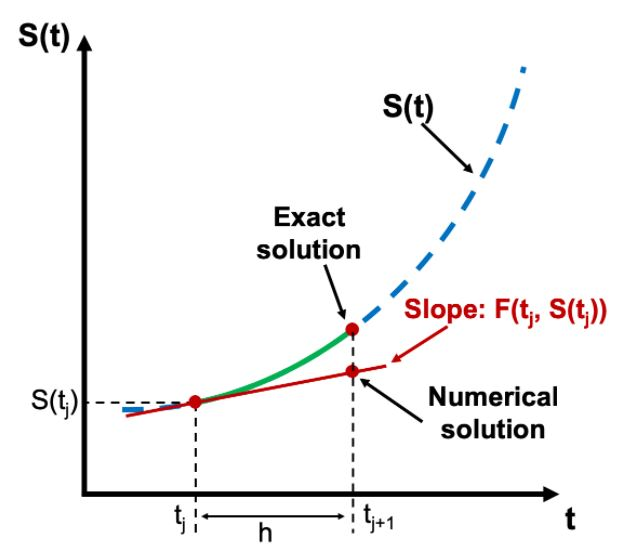

Assume we are given a function $F(t,S(t))$ that computes $\frac{dS(t)}{dt}$, a numerical grid, $t$, of the interval, $[t_0,t_f]$, and an initial state value $S_0=S(t_0)$. We use the following steps:

1. Store $S_0=S(t_0)$ in an array called $S$.
2. Compute $S(t_1)=S_0+hF(t_0,S_0)$.
3. Store $S_1=S(t_1)$ in $S$.
4. Compute $S(t_2)=S_1+hF(t_1,S_1)$.
5. Store $S_2=S(t_2)$ in $S$.
6. ...
7. Compute $S(t_f)=S_{f-1}+hF(t_{f-1},S_{f-1})$.
8. Store $S_f=S(t_f)$ in $S$.
9. $S$ is the aproximation of the solution to the initial value problem.

The differential equation $f'(t)=e^{-t}$ with an initial condition $f_0=-1$ has the exact solution $f(t)=-e^{-t}$.

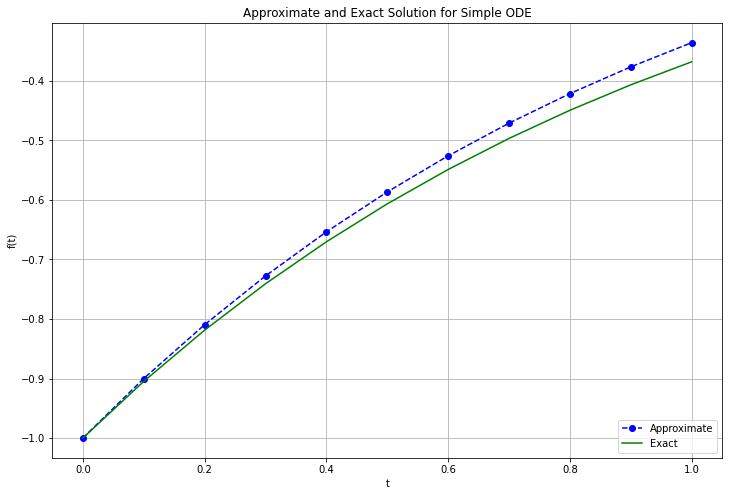

In [ ]:
# Define parameters
f = lambda t, s: np.exp(-t) # ODE
h = 0.1 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

If we reduce the step size, $h$, from $0.1$ down to $0.01$ then we get a better approximation.

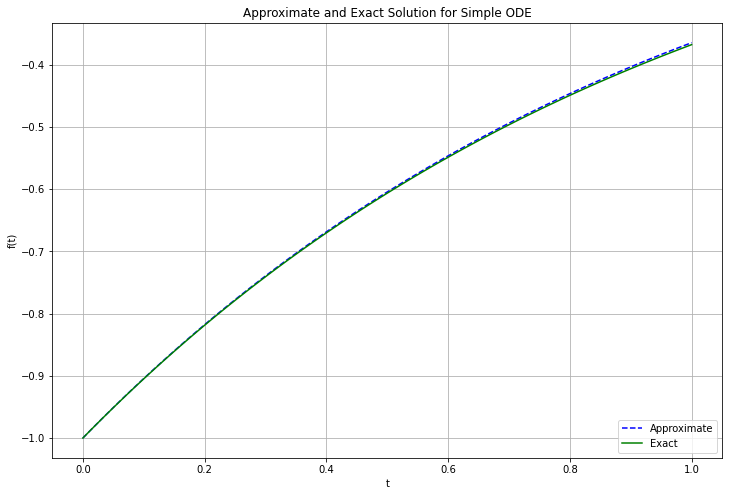

In [ ]:
h = 0.01 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'b--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()